In [1]:
#upload random_1000.csv to the notebook then run
#in the end, private_query.txt will be generated to contain the results

In [2]:
import io
import pandas as pd
import random
import numpy
import matplotlib.pyplot as plt
from google.colab import files


In [3]:

df = pd.read_csv('random_1000.csv')


In [4]:
df.count

<bound method DataFrame.count of                       course_id       userid_DI  ... gender ndays_act
0    HarvardX/CB22x/2013_Spring  MHxPC130069875  ...      m         4
1    HarvardX/CB22x/2013_Spring  MHxPC130114587  ...      m         4
2    HarvardX/CB22x/2013_Spring  MHxPC130122866  ...      m         1
3    HarvardX/CB22x/2013_Spring  MHxPC130470188  ...      m         2
4    HarvardX/CB22x/2013_Spring  MHxPC130263156  ...      m         2
..                          ...             ...  ...    ...       ...
995  HarvardX/CB22x/2013_Spring  MHxPC130289759  ...      f         1
996  HarvardX/CB22x/2013_Spring  MHxPC130474924  ...      m         4
997  HarvardX/CB22x/2013_Spring  MHxPC130153023  ...      f         1
998  HarvardX/CB22x/2013_Spring  MHxPC130233232  ...      m         0
999  HarvardX/CB22x/2013_Spring  MHxPC130167152  ...      f         0

[1000 rows x 7 columns]>

In [5]:
n = len(df.index) #1000
m = 10
query = 'India'
uniform_range_lower = 0
uniform_range_upper = 1
variance = 0.7837451260849972

In [6]:
df.iloc[0]

course_id            HarvardX/CB22x/2013_Spring
userid_DI                        MHxPC130069875
final_cc_cname_DI                         India
LoE_DI                                Secondary
YoB                                        1994
gender                                        m
ndays_act                                     4
Name: 0, dtype: object

In [7]:
df.iloc[0,2]

'India'

In [8]:
def counting_queries(df, query, m, n, uniform_range_lower, uniform_range_upper, variance):
  
  q = [0 for i in range(n)]
  for i in range(n):
    if df.iloc[i,2] == query:       #if entry matches query
      q[i] = 1

  
  random_arr = [[random.uniform(0,1) for i in range(m)] for j in range(n)]
  random_arr[0]

  for i in range(n):
    random_arr[i][-1] = q[i] - sum(random_arr[i][:-1])
  random_arr[0]

  x = zip(*random_arr)
  curator_output = []
  for y in x:
    curator_output.append(sum(y))

  curator_noisy = []
  for c in curator_output:
    curator_noisy.append(numpy.random.laplace(c, variance))

  private_ans = sum(curator_noisy)

  

  return private_ans

In [9]:
def true_query_value(query, n):
  q = [0 for i in range(n)]
  for i in range(n):
    if df.iloc[i,2] == query:       #if entry matches query
      q[i] = 1

  actual_ans = sum(q)
  return actual_ans

In [10]:
x = counting_queries(df=df, query=query, m=m, n=n, uniform_range_lower=uniform_range_lower, uniform_range_upper=uniform_range_upper, variance=variance)
x

103.3815922119129

In [11]:
m_list = []
for i in range(1,n+1):
  """
  if i <= 100:
    m_list.append(i)
  elif i%10 == 0:
    m_list.append(i)
  """
  m_list.append(i)




In [12]:
private_ans = []
for m in m_list:
  y = counting_queries(df=df, query=query, m=m, n=n, uniform_range_lower=uniform_range_lower, uniform_range_upper=uniform_range_upper, variance=variance)
  print(m,y)
  private_ans.append((m,y))

actual_ans = true_query_value(query, n)
actual_ans 


1 102.38158632597384
2 106.28778583182736
3 105.59169808758202
4 104.6704236558196
5 107.48878359124046
6 98.59494111582262
7 104.77219081421026
8 99.22036682615726
9 108.51440814500029
10 102.76763807944008
11 106.88515342294068
12 104.03084026931356
13 105.24763614202857
14 101.07998714572113
15 106.69443301142019
16 104.1433656690715
17 106.62324323105531
18 100.18525347045397
19 107.82902270737759
20 104.51448685140531
21 103.4961393766007
22 113.80574133217851
23 113.32302187491587
24 101.2810777831055
25 106.15979214669642
26 104.36456106542391
27 94.52635997624748
28 112.24968880918641
29 101.43694384255286
30 108.55942363339818
31 105.33170904855979
32 113.56171047937096
33 99.81110992962022
34 94.0522059920313
35 112.51234654883592
36 104.17683620279786
37 117.07302353465275
38 107.4559972367424
39 103.68505817589175
40 117.17397026625622
41 111.62993273348184
42 105.38373573254285
43 107.94562114511427
44 95.02690509275999
45 117.57308773092882
46 105.18186478570715
47 102.71

104

In [13]:
textfile = open("counting_query_laplace.txt", "w")
for element in private_ans:
  
  textfile.write(','.join(str(e) for e in element))
  textfile.write("\n")
textfile.close()

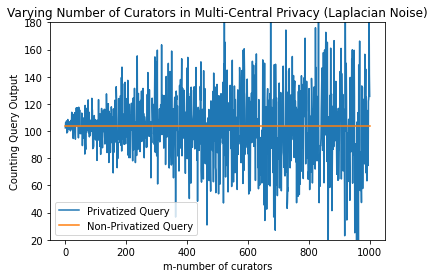

In [14]:
actual_ans_list = [actual_ans for i in range(n)]  #n=1000, m=1-1000
private_ans_list = [p[1] for p in private_ans ]

plt.plot(m_list, private_ans_list, label="Privatized Query")
plt.plot(m_list, actual_ans_list, label="Non-Privatized Query")
plt.plot()

plt.xlabel("m-number of curators")
plt.ylabel("Counting Query Output")
plt.title("Varying Number of Curators in Multi-Central Privacy (Laplacian Noise)")
plt.ylim([20, 180])
plt.legend()
plt.savefig('counting_query_laplace.png')
plt.show()

In [15]:
# n = 100     
# m_list = []
# for i in range(1,n+1):
#   m_list.append(i)
# private_ans = []
# for m in m_list:
#   y = counting_queries(df=df, query=query, m=m, n=n, uniform_range_lower=uniform_range_lower, uniform_range_upper=uniform_range_upper, variance=variance)
#   print(m,y)
#   private_ans.append((m,y))

# actual_ans = true_query_value(query, n)
# actual_ans 

In [16]:
# actual_ans_list = [actual_ans for i in range(n)]        
# private_ans_list = [p[1] for p in private_ans ]
# plt.plot(m_list, private_ans_list, label="Privatized Query")
# plt.plot(m_list, actual_ans_list, label="Non-Privatized Query")
# plt.plot()

# plt.xlabel("m-number of curators")
# plt.ylabel("Counting Query Output")
# plt.title("Varying Number of Curators in Multi-Central Privacy (Laplacian Noise)")    #n=100, m=1-100
# plt.legend()
# plt.show()  

In [17]:
#utility evaluation
n_list = [100, 500, 1000]
m_list2 = [1, 10, 50, 100, 500, 1000]

actual_ans = true_query_value(query, n)

textfile = open("varying_n_laplace.txt", "w")
for n in n_list:
  util = []
  for m in m_list2:
    if m <= n:
      error = []
      for i in range(100):
        y = counting_queries(df=df, query=query, m=m, n=n, uniform_range_lower=uniform_range_lower, uniform_range_upper=uniform_range_upper, variance=variance)
        error.append(abs(actual_ans-y)/n)
      average_error = sum(error)/len(error)
      print(n, m, average_error)
      util.append((m, average_error))

  for element in util:
    textfile.write(f'n={n},m={element[0]},error={element[1]}')
    textfile.write(','.join(str(e) for e in element))
    textfile.write("\n")

textfile.close()


100 1 0.8804558676584727
100 10 0.880722476554158
100 50 0.8927303084446728
100 100 0.8705208730915818
500 1 0.09959728276725237
500 10 0.09987922868438076
500 50 0.10019061292179933
500 100 0.09898283500877011
500 500 0.1008790920221846
1000 1 0.0007750442500741094
1000 10 0.002937012463152969
1000 50 0.0061174725210793625
1000 100 0.0077741852127087615
1000 500 0.02052553268364077
1000 1000 0.026006310698571036
